# How are in demand skills trending for Data Engineers?

### Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

## Import Libraries and Data

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Group the Skills by Month

Select only those job postings that are for Data Engineers and the job country is the Germany. Then extract the month from each jobs posting date to see when jobs are listed. Next,converts a column that lists skills into a usable list format. Finally,it rearranges the data sot that each skill from the list gets its own row.

In [4]:
df_DE_GR = df[(df['job_title'] == 'Data Engineer') & (df['job_country'] == 'Germany')].copy()

df_DE_GR['job_posted_month_no'] = df_DE_GR['job_posted_date'].dt.month

df_DE_GR_explode = df_DE_GR.explode('job_skills')

### Pivot in Prep for Plotting

Create a pivot table from the `df_DE_GR_explode`, setting 'month' as the index , `job_skills` as the columns, and fills missing entries with zero.

In [5]:
df_DE_GR_pivot = df_DE_GR_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size',fill_value=0)

df_DE_GR_pivot

job_skills,airflow,alteryx,angular,ansible,atlassian,aws,azure,bash,bigquery,c,...,typescript,unify,unity,unix,vba,vmware,vue,windows,word,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,10,0,0,0,0,12,15,1,7,0,...,0,0,0,0,0,0,0,0,1,0
2,11,0,1,1,0,15,17,3,6,2,...,1,0,0,1,1,0,0,1,4,0
3,13,0,0,2,0,18,15,1,3,0,...,0,0,1,1,0,1,0,0,1,0
4,24,0,2,2,0,21,20,1,5,0,...,2,0,0,0,0,1,1,1,1,0
5,14,0,0,1,1,20,17,5,4,0,...,1,0,0,2,0,0,0,4,0,0
6,6,1,0,0,0,10,9,1,1,0,...,0,1,0,0,0,0,0,0,1,0
7,6,0,0,0,0,13,13,0,1,2,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,2,0,13,5,1,0,1,...,0,0,0,0,1,0,0,0,0,0
9,7,2,4,0,0,29,36,1,8,1,...,1,0,0,3,1,0,0,1,0,1


#### Sorting columns by count and change month numbers to names

It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the column based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [6]:
df_DE_GR_pivot.loc['Total'] = df_DE_GR_pivot.sum()
df_DE_GR_pivot = df_DE_GR_pivot[df_DE_GR_pivot.loc['Total'].sort_values(ascending=False).index]
df_DE_GR_pivot = df_DE_GR_pivot.drop('Total')

df_DE_GR_pivot

job_skills,python,sql,azure,aws,spark,java,kafka,databricks,airflow,snowflake,...,phoenix,powerbi,sqlite,sharepoint,slack,splunk,unify,trello,vue,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,32,28,15,12,18,16,12,9,10,3,...,0,0,0,1,0,0,0,0,0,0
2,32,32,17,15,14,9,10,8,11,4,...,0,0,0,0,0,0,0,0,0,0
3,37,34,15,18,16,8,14,9,13,9,...,0,0,0,0,0,0,0,0,0,0
4,54,39,20,21,26,13,17,16,24,16,...,0,0,0,0,0,0,0,0,1,0
5,27,27,17,20,11,8,10,6,14,8,...,0,1,0,0,1,0,0,1,0,0
6,22,17,9,10,10,5,7,7,6,3,...,0,0,0,0,0,0,1,0,0,0
7,23,19,13,13,16,6,5,3,6,2,...,0,0,0,0,0,0,0,0,0,0
8,20,18,5,13,6,6,5,4,8,6,...,0,0,0,0,0,0,0,0,0,0
9,57,60,36,29,23,17,12,17,7,17,...,0,0,0,0,0,0,0,0,0,1


## Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for Data Engineers, indexed by month. It selects the first five columns and plots them.

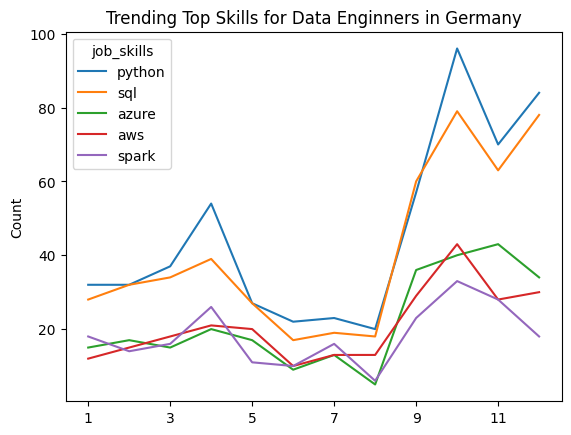

In [7]:
df_DE_GR_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Enginners in Germany')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in `df_DE` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DE_totals`. This is needed to compute the percentage.

In [8]:
DE_totals = df_DE_GR.groupby('job_posted_month_no').size()

DE_totals

job_posted_month_no
1      46
2      49
3      50
4      64
5      41
6      29
7      39
8      25
9     128
10    164
11    141
12    138
dtype: int64

This code calculates the percentage of each skills occorrunce for each month by dividing the first 12 rows of the `df_DE_pivot` DataFrame, which contains skill counts,by the monthly totals in `DE_totals` and multiplying by 100. The new DataFrame,`df_DE_pivot_percent`, shows skill distributions as percentage of total monthly job entries.

In [9]:
df_DE_GR_percent = df_DE_GR_pivot.iloc[:12].div(DE_totals/100, axis=0)

df_DE_GR_percent = df_DE_GR_percent.reset_index()
df_DE_GR_percent['job_posted_month'] = df_DE_GR_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DE_GR_percent = df_DE_GR_percent.set_index('job_posted_month')
df_DE_GR_percent = df_DE_GR_percent.drop(columns='job_posted_month_no')

df_DE_GR_percent

job_skills,python,sql,azure,aws,spark,java,kafka,databricks,airflow,snowflake,...,phoenix,powerbi,sqlite,sharepoint,slack,splunk,unify,trello,vue,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,69.565217,60.869565,32.608696,26.086957,39.130435,34.782609,26.086957,19.565217,21.739130,6.521739,...,0.000000,0.000000,0.000000,2.173913,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000
Feb,65.306122,65.306122,34.693878,30.612245,28.571429,18.367347,20.408163,16.326531,22.448980,8.163265,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000
Mar,74.000000,68.000000,30.000000,36.000000,32.000000,16.000000,28.000000,18.000000,26.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000
Apr,84.375000,60.937500,31.250000,32.812500,40.625000,20.312500,26.562500,25.000000,37.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.5625,0.00000
May,65.853659,65.853659,41.463415,48.780488,26.829268,19.512195,24.390244,14.634146,34.146341,19.512195,...,0.000000,2.439024,0.000000,0.000000,2.439024,0.00000,0.000000,2.439024,0.0000,0.00000
Jun,75.862069,58.620690,31.034483,34.482759,34.482759,17.241379,24.137931,24.137931,20.689655,10.344828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.448276,0.000000,0.0000,0.00000
Jul,58.974359,48.717949,33.333333,33.333333,41.025641,15.384615,12.820513,7.692308,15.384615,5.128205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000
Aug,80.000000,72.000000,20.000000,52.000000,24.000000,24.000000,20.000000,16.000000,32.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000
Sep,44.531250,46.875000,28.125000,22.656250,17.968750,13.281250,9.375000,13.281250,5.468750,13.281250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.78125


## Plot Monthly Skill Demand

Creates a line plot for the top five skills of data engineers, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DE_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability.

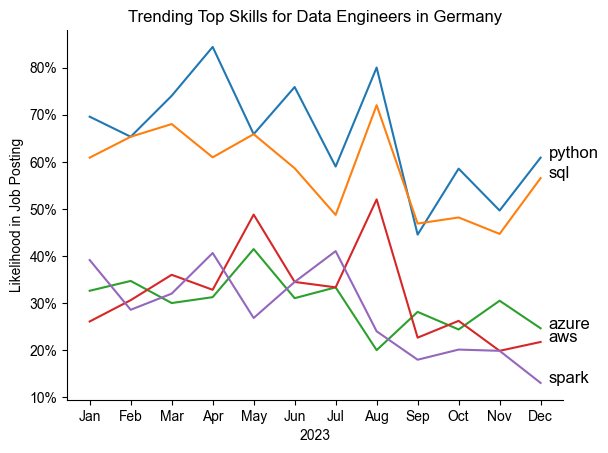

In [10]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DE_GR_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Engineers in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()